NOTES:
- 'checkpoint' file is not important if u load checkpoints directly by name
- Now train with minimun 5 keypoints per person
- Make sure to clean out temp/ before start training a new model

In [1]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-982f5efe-af6b-918b-c75e-57ed8aa257c1)


GPU 0: Tesla P100-PCIE-16GB 

In [2]:
!unzip ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip

Archive:  ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip
   creating: dataset/tfrecords/
   creating: dataset/tfrecords/valid/
  inflating: dataset/tfrecords/valid/file_valid_02-1551.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_01-2048.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_00-2048.tfrec  
   creating: dataset/tfrecords/train/
  inflating: dataset/tfrecords/train/file_train_21-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_00-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_47-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_50-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_25-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_20-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_62-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_52-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_36-2048.tfrec  
  inflating: dataset/tfrecords/train/file_trai

In [3]:
import sys
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sys.path.append('/content/drive/MyDrive/single-person-pose-estimation')
from configs import default_config as cfg



---



---
Dataset


In [4]:
from dataset_builder import DatasetBuilder

In [5]:
ds_builder = DatasetBuilder(cfg)

Train dataset with 66 tfrecords and 134214 examples.
Valid dataset with 3 tfrecords and 5647 examples.




---



---
Model


In [6]:
from model.hourglass import HourGlassNet

In [7]:
HG = HourGlassNet(cfg.NUM_KEYPOINTS, cfg.HG_NUM_STACKS, cfg.HG_NUM_FILTERS, 
              (cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH, 3), 
              (cfg.LABEL_HEIGHT, cfg.LABEL_WIDTH, cfg.NUM_KEYPOINTS))
model = HG.create_hg_model()

Created HourGlassmodel:
    1. 4 stacks.
    2. 12080324 parameters. Call object.get_summary() for more detail.
    




---



---
TRAINER


In [8]:
from trainer import Trainer



---
Initial train (run once at the start)


In [9]:
trainer = Trainer(model, ds_builder, epochs = 3, learning_rate = 1e-3, loss_str = 'weighted_mse', config = cfg)

Weighed Mean Squared Error


In [ ]:
trainer.train()

First training with:
    1. Current date 26-05-2022.
    2. Number of epochs 3.
    3. Batch size 16.
    4. Optimizer configs: {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
    

Learning rate for epoch 1 is 0.0010000000474974513
Epoch 1/3
3723/8388 [============>.................] - ETA: 24:06 - loss: 0.2245 - heatmap1_loss: 0.0607 - heatmap2_loss: 0.0570 - heatmap3_loss: 0.0543 - heatmap4_loss: 0.0524

In [ ]:
# to drive
!cp -r ./temp ./drive/MyDrive/single-person-pose-estimation



---
Resume train



In [ ]:
# from drive
!cp -r ./drive/MyDrive/single-person-pose-estimation/temp ./

In [ ]:
trainer = Trainer(model, ds_builder, epochs = 15, learning_rate = 0.5e-3, loss_str = 'weighted_mse', config = cfg)

Weighed Mean Squared Error


In [ ]:
trainer.resume_training()

Loading weights from epoch 15
Loaded: 24-05-2022_E15_cont.ckpt.index
---------------------------------------------------------
- Result from last train session number 1 at epoch 15:
loss: 0.113735981285572
heatmap1_loss: 0.0319940820336341
heatmap2_loss: 0.0280093662440776
heatmap3_loss: 0.0269860867410898
heatmap4_loss: 0.0267466343939304
val_loss: 0.1126897260546684
val_heatmap1_loss: 0.0314714759588241
val_heatmap2_loss: 0.0277786329388618
val_heatmap3_loss: 0.0268351063132286
val_heatmap4_loss: 0.0266044978052377
---------------------------------------------------------
- Best current val_loss at epoch 15:
loss: 0.113735981285572
heatmap1_loss: 0.0319940820336341
heatmap2_loss: 0.0280093662440776
heatmap3_loss: 0.0269860867410898
heatmap4_loss: 0.0267466343939304
val_loss: 0.1126897260546684
val_heatmap1_loss: 0.0314714759588241
val_heatmap2_loss: 0.0277786329388618
val_heatmap3_loss: 0.0268351063132286
val_heatmap4_loss: 0.0266044978052377
-----------------------------------------

In [ ]:
# to drive
!cp -r ./temp ./drive/MyDrive/single-person-pose-estimation




---


---


Test prediction

Should reset runtime


In [ ]:
# from drive
!cp -r ./drive/MyDrive/single-person-pose-estimation/temp ./

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
trainer = Trainer(model, ds_builder, epochs = 20, learning_rate = 0.001, loss_str = 'mse', config = cfg)

Mean Squared Error


In [ ]:
ds_train, ds_valid = ds_builder.build_datasets()

In [ ]:
#loaded_model = trainer.get_best_weights_model()
loaded_model = trainer.get_lattest_weights_model()

Loading lattest trained weights from epoch 30
Loaded: 25-05-2022_E30_cont.ckpt.index


In [ ]:
loaded_model.evaluate(ds_valid, steps = np.ceil(ds_builder.num_valid_examples // cfg.BATCH_SIZE))

352/352 [==============================] - 50s 99ms/step - loss: 0.0079 - heatmap1_loss: 0.0024 - heatmap2_loss: 0.0019 - heatmap3_loss: 0.0018 - heatmap4_loss: 0.0018


[0.007915088906884193,
 0.002353119198232889,
 0.0019191100727766752,
 0.0018293206812813878,
 0.0018135391874238849]

In [ ]:
it = iter(ds_valid)

In [ ]:
images_batch, heatmaps_batch = next(it)

In [ ]:
pred1, pred2, pred3, pred4 = loaded_model.predict(images_batch)

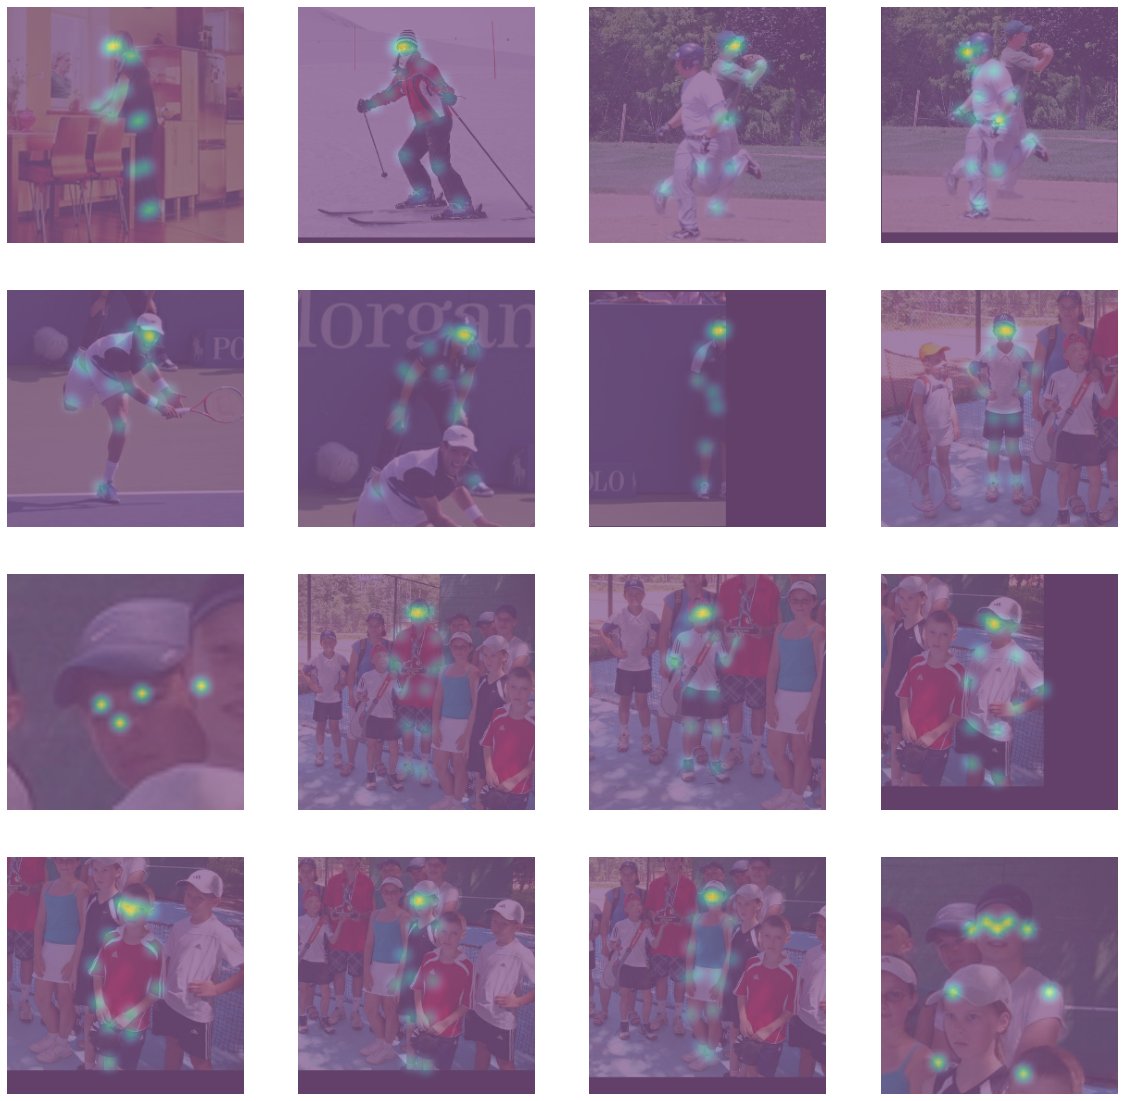

In [ ]:
#Truth ground
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    h = tf.image.resize(heatmaps_batch[i], (256, 256))
    plt.imshow(tf.reduce_sum(h, axis = -1), alpha = 0.5)
    plt.axis("off")

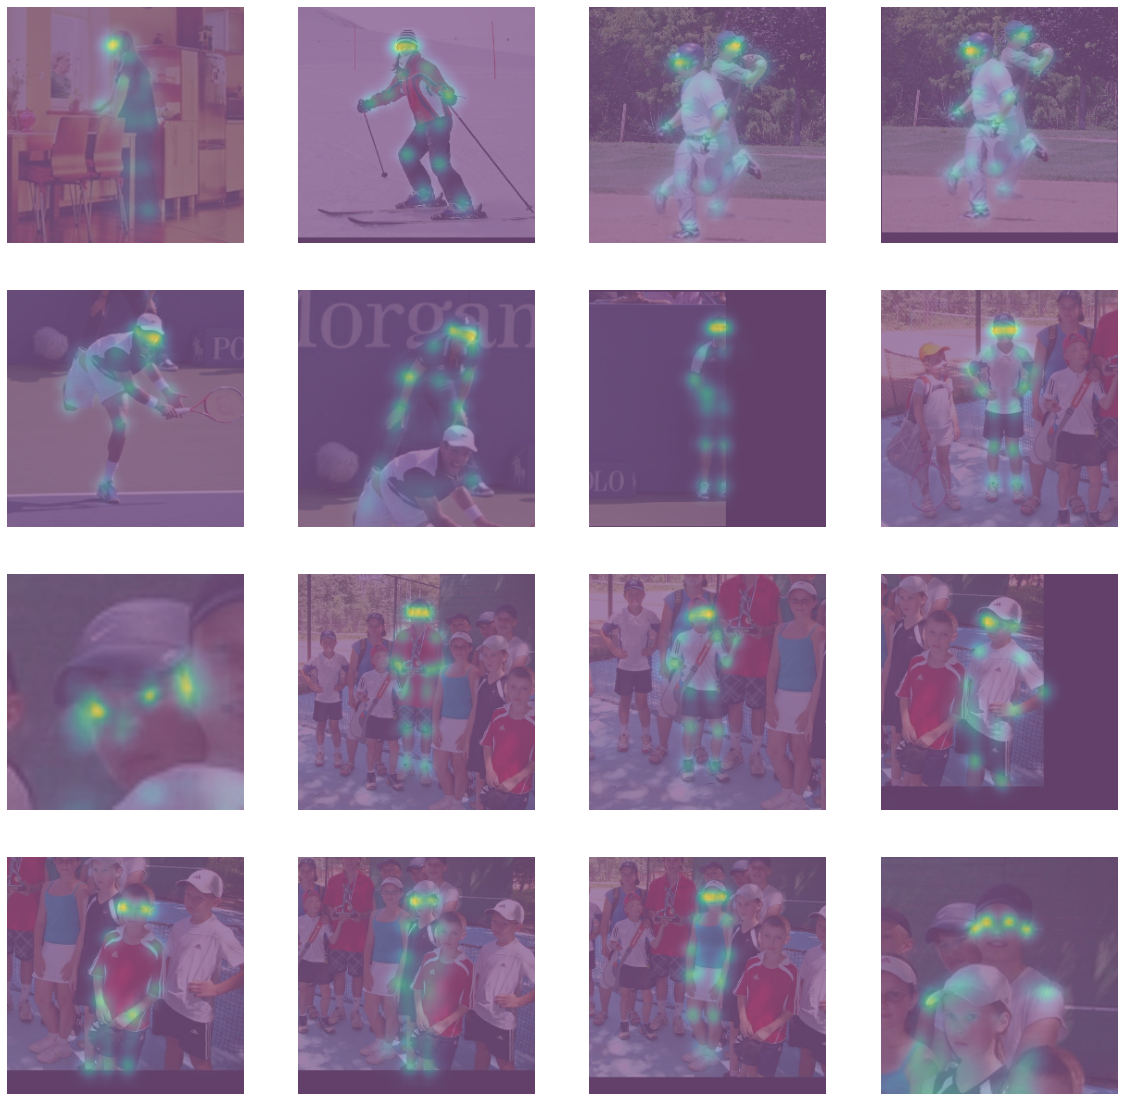

In [ ]:
# MSE weighted
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    p = tf.image.resize(pred4[i], (256,256))
    plt.imshow(tf.reduce_sum(p, axis = -1), alpha = 0.5)
    plt.axis("off")

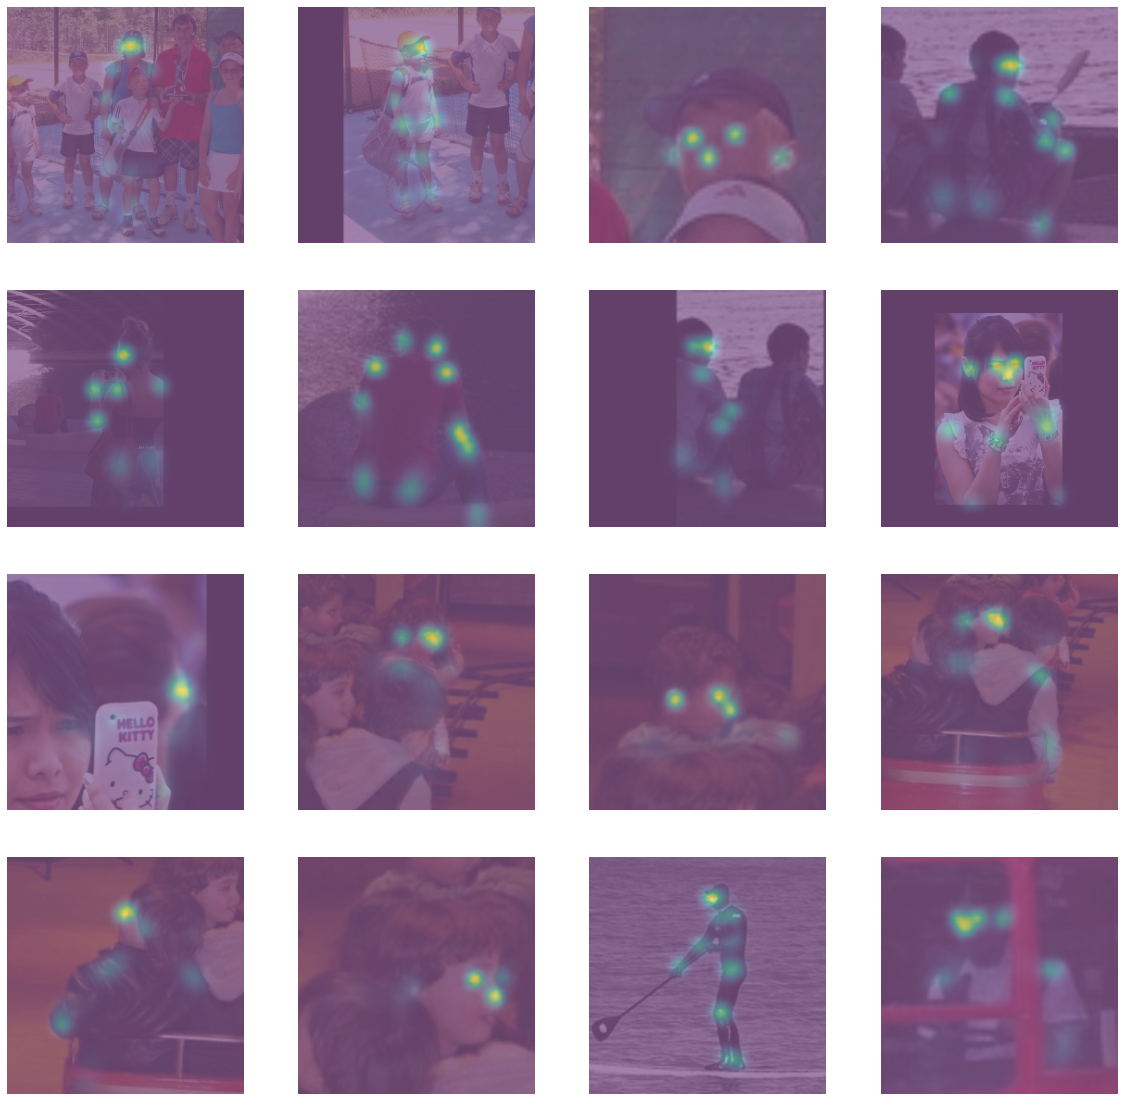

In [ ]:
# MSE loss
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    p = tf.image.resize(pred4[i+16], (256,256))
    plt.imshow(tf.reduce_sum(p, axis = -1), alpha = 0.5)
    plt.axis("off")



---

Save the whole model

In [ ]:
trainer.save_model('trained_models/first_Adam_RME')

Loading best weights from temp/checkpoints
Loaded: 27-03-2022-E100.cpkt.index
INFO:tensorflow:Assets written to: trained_models/first_Adam_RME/assets


In [ ]:
!cp -r ./trained_models ./drive/MyDrive/single-person-pose-estimation 